In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.2


In [3]:
data=pd.read_csv("data/station_temperature_data.csv.gz",index_col=False)

In [4]:
info=pd.read_excel("data/station_info.xlsx")

In [5]:
info.head()

,Unnamed: 0,ID,Station,Latitude,Longitude,Brightness,Elevation
0,0,ACW00011604,SAVE,57.7667,11.8667,45.0,18.0
1,1,AE000041196,SHARJAH_INTER_AIRP,25.3330,55.5170,39.0,34.0
2,2,AEM00041184,RAS_AL_KHAIMAH_INTE,25.6170,55.9330,17.0,31.0
3,3,AEM00041194,DUBAI_INTL,25.2550,55.3640,104.0,10.4
4,4,AEM00041216,ABU_DHABI_BATEEN_AIR,24.4300,54.4700,114.0,3.0


In [6]:
data.tail()

,Unnamed: 0,time,SAVE,SHARJAH_INTER_AIRP,RAS_AL_KHAIMAH_INTE,DUBAI_INTL,ABU_DHABI_BATEEN_AIR,ABU_DHABI_INTL,AL_AIN_INTL,NORTH_SALANG,...,BULAWAYO_GOETZ_OBS,BULAWAYO_AIRPORT,WEST_NICHOLSON,MASVINGO,BUFFALO_RANGE,CHIPINGE,BEITBRIDGE,HARARE_BELVEDERE,GRAND_REEF,GWELO
136,136,2016,28.198333,27.810000,NaN,29.545833,NaN,NaN,28.935000,NaN,...,20.777273,NaN,NaN,20.6625,NaN,20.178333,NaN,NaN,NaN,NaN
137,137,2017,28.298333,28.335000,NaN,30.027500,NaN,31.6730,29.655000,NaN,...,18.564286,NaN,NaN,19.0200,NaN,NaN,NaN,NaN,NaN,NaN
138,138,2018,28.081667,28.904545,NaN,30.098182,NaN,29.7925,29.965455,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,139,2019,28.266667,28.251667,NaN,29.585833,NaN,29.4000,29.061667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,140,2020,29.550000,19.730000,NaN,21.280000,NaN,20.5750,19.460000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SAVE')

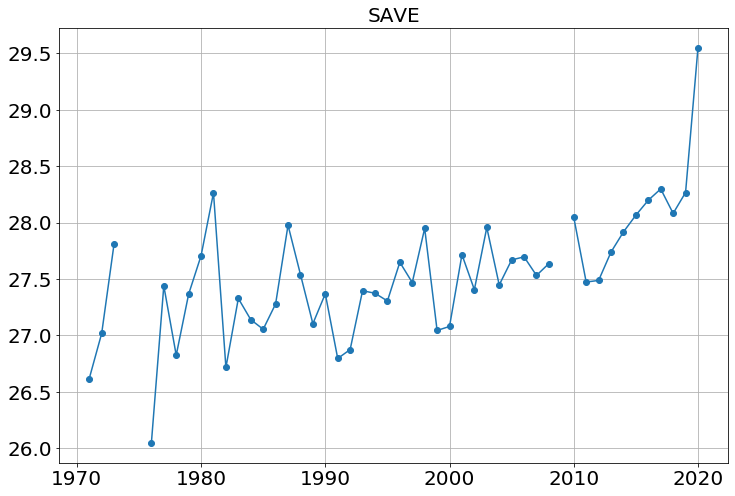

In [33]:
station='SAVE'
x=data['time']
y=data[station]
plot(x,y,'-o')
title(station)

In [35]:
x,y   # lots of nans!

(0      1880
 1      1881
 2      1882
 3      1883
 4      1884
        ... 
 136    2016
 137    2017
 138    2018
 139    2019
 140    2020
 Name: time, Length: 141, dtype: int64,
 0            NaN
 1            NaN
 2            NaN
 3            NaN
 4            NaN
          ...    
 136    28.198333
 137    28.298333
 138    28.081667
 139    28.266667
 140    29.550000
 Name: SAVE, Length: 141, dtype: float64)

In [36]:
def get_xy(data,station):
    x,y=array(data[['time',station]].dropna()).T    
    return x,y

In [37]:
x,y=get_xy(data,station)

In [38]:
model=ols('y ~ x', data={'y':y,'x':x})
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     29.29
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           2.31e-06
Time:                        11:45:46   Log-Likelihood:                -27.648
No. Observations:                  47   AIC:                             59.30
Df Residuals:                      45   BIC:                             63.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2808      9.203     -2.421      0.020     -40.816      -3.745
x              0.0250      0.005      5.412      0.000       0.016       0.034
==============================================================================
Omnibus:                       11.762   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.954
Skew:                           0.925   Prob(JB):                      0.00154
Kurtosis:                       4.787   Cond. No.                     2.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

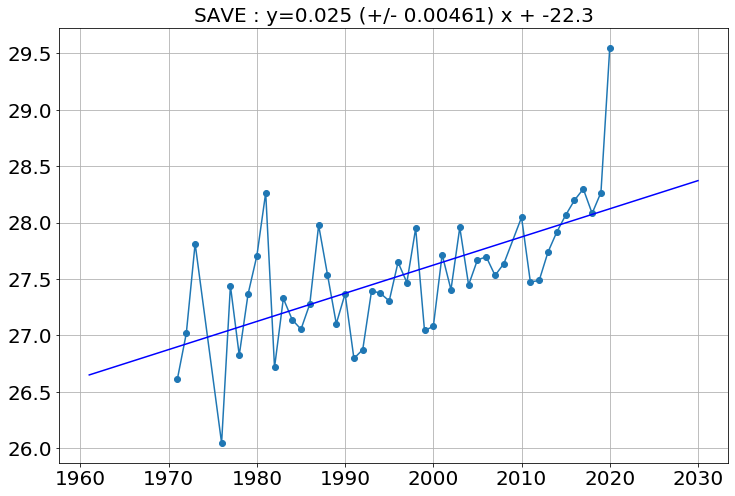

In [46]:
xx=linspace(min(x)-10,max(x)+10,20)
yy=results.predict({'x':xx})

m=results.params['x']
mσ=results.bse['x']

b=results.params['Intercept']

plot(x,y,'-o')
title(station+" : y=%.3g (+/- %.4g) x + %.3g" % (m,mσ,b))
plot(xx,yy,'b-')

In [45]:
results.bse

Intercept    9.202848
x            0.004610
dtype: float64